In [2]:
import sys
sys.path.append("../") # go to parent dir

%load_ext autoreload
%autoreload 2

In [3]:
from evrp.utils.utilities import create_optimal_edges, create_json_out, update_instance_json, read_instance_json_str
from evrp.utils.plot import plot_interactive_graph, plot_evrptwv2g
from evrp.milp.evrptw import EVRPTW

import pandas as pd
import numpy as np

import json

pd.options.plotting.backend = "plotly"

# Convert Schneider instance to E-VRP-TW-V2G

In [ ]:
schneider_instance = 'c106C15'
convert_txt_instances_to_csv(schneider_instance)

# Full solve

Objective options: {Schneider} OR {OpEx, CapEx, Cycle, EA, DCM, Delivery}

Constraint options: {Start=End, FullStart=End, NoXkappaBounds, NoMinVehicles, NoSymmetry, NoXd}

In [369]:
instance = 'r105C5_e'
fpath = 'config/test_instances/' + instance + '.csv'

In [370]:
m = EVRPTW(problem_type='Schneider cycle')
m.full_solve(fpath)

2021-02-09 02:44:26 INFO     Building abstract model
2021-02-09 02:44:26 INFO     Defining parameters and sets
2021-02-09 02:44:26 INFO     Defining variables
2021-02-09 02:44:26 INFO     Defining constraints
2021-02-09 02:44:26 INFO     Importing EVRPTW MILP instance: r105C5_e
2021-02-09 02:44:26 INFO     Reading CSV
2021-02-09 02:44:26 INFO     Creating graph
2021-02-09 02:44:26 INFO     Creating timeseries data
2021-02-09 02:44:26 INFO     Creating duplicates and extended graph
2021-02-09 02:44:26 INFO     Calculating distance matrix
2021-02-09 02:44:26 INFO     Creating parameters
2021-02-09 02:44:26 INFO     Creating instance
2021-02-09 02:44:26 INFO     Problem type: Schneider cycle
2021-02-09 02:44:26 INFO     Solving instance...


Using license file C:\Users\ramia\gurobi.lic
Academic license - for non-commercial use only - expires 2021-04-10
Read LP format model from file C:\Users\ramia\AppData\Local\Temp\tmpmnay2lfg.pyomo.lp
Reading time = 0.02 seconds
x452: 349 rows, 452 columns, 1274 nonzeros
Changed value of parameter TimeLimit to 300.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter Cuts to 3
   Prev: -1  Min: -1  Max: 3  Default: -1
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 349 rows, 452 columns and 1274 nonzeros
Model fingerprint: 0xe136975c
Model has 1305 quadratic constraints
Variable types: 181 continuous, 271 integer (271 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+02]
  QMatrix range    [1e+00, 1e+01]
  QLMatrix range   [1e+00, 3e+02]
  Objective range  [4e+00, 1e+03]

2021-02-09 02:44:41 INFO     Done


In [371]:
print(m.results)


Problem: 
- Name: x452
  Lower bound: 2156.0820694641707
  Upper bound: 2156.0820694641707
  Number of objectives: 1
  Number of constraints: 1654
  Number of variables: 452
  Number of binary variables: 271
  Number of integer variables: 271
  Number of continuous variables: 181
  Number of nonzeros: 1274
  Sense: minimize
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Wall time: 14.614906311035156
  Error rc: 0
  Time: 14.836338520050049
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



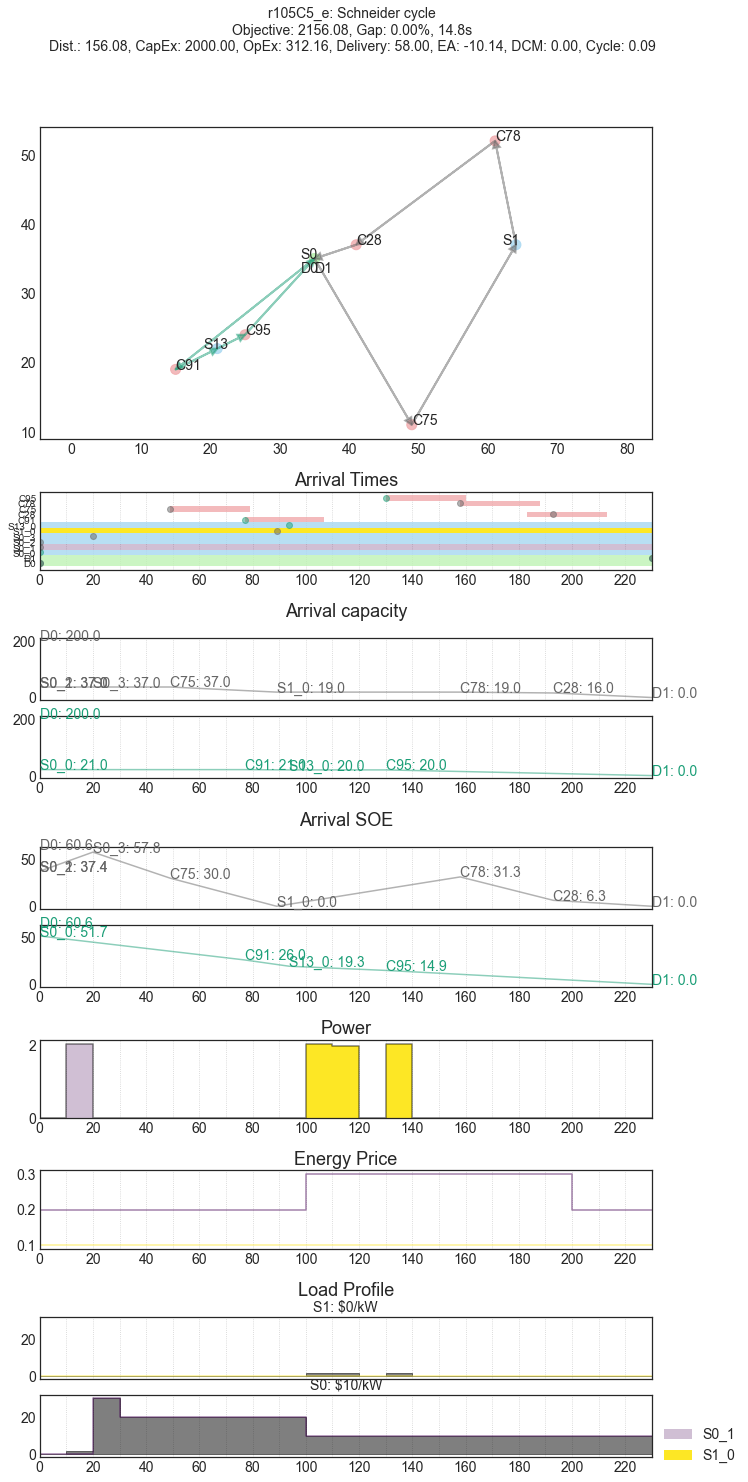

In [372]:
x, xp, traces, routes = plot_evrptwv2g(m)

# Archive, fix route, modify objective, and warmstart solve

In [374]:
m.archive_instance_result()

In [375]:
m.fix_variables(['xgamma'])

In [376]:
m.remake_objective(m.instance, 'Opex Capex EA DCM cycle')

2021-02-09 02:45:05 INFO     Problem type: Opex Capex EA DCM cycle


In [378]:
m.warmstart_solve()

2021-02-09 02:45:18 INFO     Solving instance with warmstart...


Using license file C:\Users\ramia\gurobi.lic
Academic license - for non-commercial use only - expires 2021-04-10
Read LP format model from file C:\Users\ramia\AppData\Local\Temp\tmp3zs2h4pa.pyomo.lp
Reading time = 0.02 seconds
: 691 rows, 319 columns, 1400 nonzeros
Read MIP start from file C:\Users\ramia\AppData\Local\Temp\tmpmewdvle3.gurobi.mst
Changed value of parameter TimeLimit to 300.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter Cuts to 3
   Prev: -1  Min: -1  Max: 3  Default: -1
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 691 rows, 319 columns and 1400 nonzeros
Model fingerprint: 0x5f799ab0
Model has 270 quadratic objective terms
Model has 963 quadratic constraints
Variable types: 181 continuous, 138 integer (138 binary)
Coefficient statistics:
  Matrix range    

2021-02-09 02:45:18 INFO     Done


In [379]:
print(m.results)


Problem: 
- Name: 
  Lower bound: 2273.6874295104776
  Upper bound: 2273.740064895064
  Number of objectives: 1
  Number of constraints: 1654
  Number of variables: 319
  Number of binary variables: 138
  Number of integer variables: 138
  Number of continuous variables: 181
  Number of nonzeros: 1400
  Sense: minimize
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Wall time: 0.06878662109375
  Error rc: 0
  Time: 0.29122233390808105
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



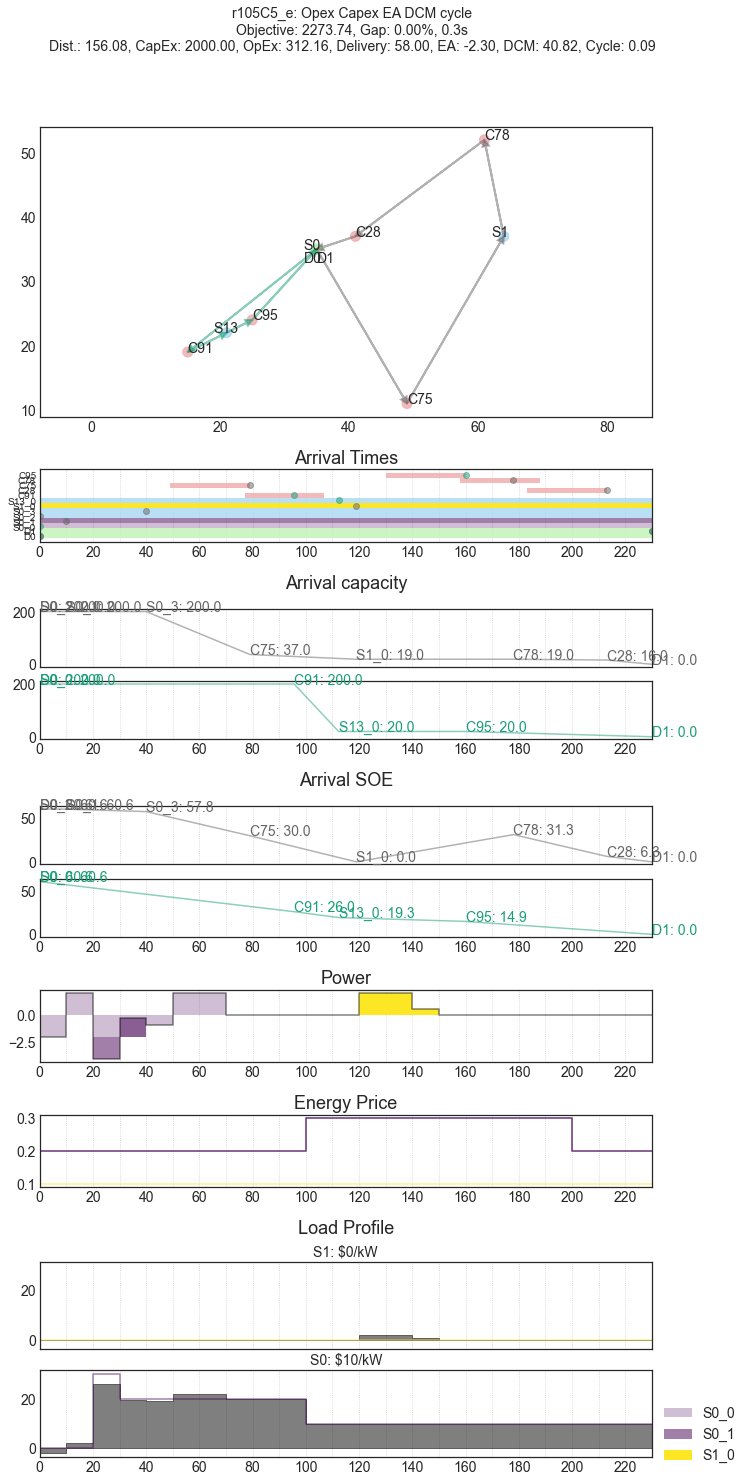

In [380]:
x, xp, traces, routes = plot_evrptwv2g(m)

# Archive, rebuild model to modify constraints, fix route, warmstart solve

In [388]:
m.archive_instance_result()

In [389]:
m.instance_archive

{'r105C5_e Schneider cycle': <pyomo.core.base.PyomoModel.ConcreteModel at 0x1ff065ef180>,
 'Opex Capex EA DCM cycle': <pyomo.core.base.PyomoModel.ConcreteModel at 0x1ff0ba57900>,
 'r105C5_e Opex Capex EA DCM cycleNoMinVehicles NoSymmetry': <pyomo.core.base.PyomoModel.ConcreteModel at 0x1ff0beaab40>}

In [390]:
m.remake_model('Opex Capex EA DCM cycle NoMinVehicles NoSymmetry', fpath)

2021-02-09 03:03:04 INFO     Defining parameters and sets
2021-02-09 03:03:04 INFO     Defining variables
2021-02-09 03:03:04 INFO     Defining constraints
2021-02-09 03:03:04 INFO     Importing EVRPTW MILP instance: r105C5_e
2021-02-09 03:03:04 INFO     Reading CSV
2021-02-09 03:03:04 INFO     Creating graph
2021-02-09 03:03:04 INFO     Creating timeseries data
2021-02-09 03:03:04 INFO     Creating duplicates and extended graph
2021-02-09 03:03:04 INFO     Calculating distance matrix
2021-02-09 03:03:04 INFO     Creating parameters
2021-02-09 03:03:04 INFO     Creating instance
2021-02-09 03:03:05 INFO     Problem type: Opex Capex EA DCM cycle NoMinVehicles NoSymmetry


In [391]:
m.set_xgamma('Opex Capex EA DCM cycle')

In [392]:
m.fix_variables(['xgamma'])

In [393]:
m.warmstart_solve()

2021-02-09 03:03:12 INFO     Solving instance with warmstart...


Using license file C:\Users\ramia\gurobi.lic
Academic license - for non-commercial use only - expires 2021-04-10
Read LP format model from file C:\Users\ramia\AppData\Local\Temp\tmpawkz0trk.pyomo.lp
Reading time = 0.02 seconds
: 687 rows, 319 columns, 1400 nonzeros
Read MIP start from file C:\Users\ramia\AppData\Local\Temp\tmpimamawp_.gurobi.mst
Changed value of parameter TimeLimit to 300.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPFocus to 3
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter Cuts to 3
   Prev: -1  Min: -1  Max: 3  Default: -1
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 687 rows, 319 columns and 1400 nonzeros
Model fingerprint: 0x768e69c3
Model has 270 quadratic objective terms
Model has 963 quadratic constraints
Variable types: 181 continuous, 138 integer (138 binary)
Coefficient statistics:
  Matrix range    

2021-02-09 03:03:12 INFO     Done


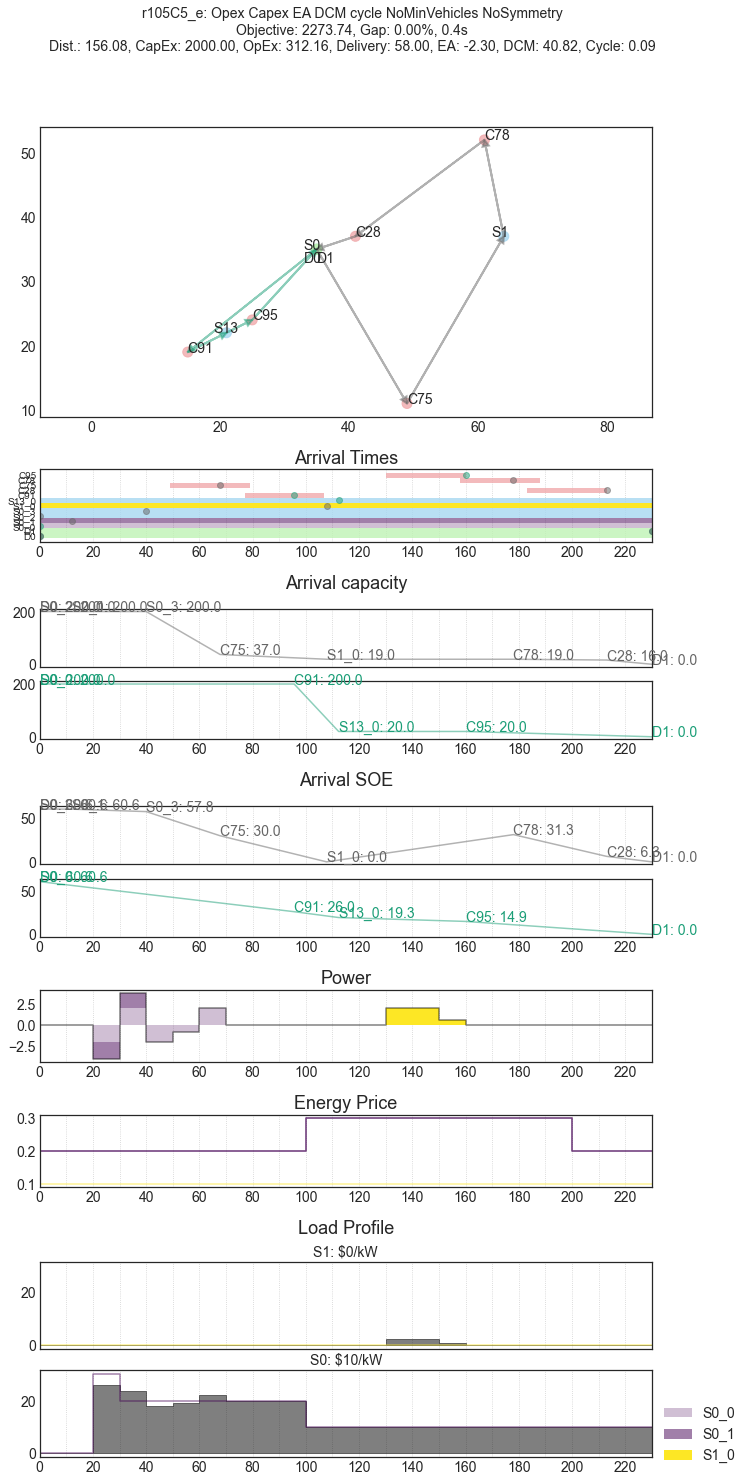

In [394]:
x, xp, traces, routes = plot_evrptwv2g(m)

# Check infeasible constraints

In [348]:
from pyomo.util.infeasible import log_infeasible_constraints

In [349]:
log_infeasible_constraints(m.instance)